In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
data = pd.DataFrame(iris.data , columns=iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
data['target'] = iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
data['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
%matplotlib inline

In [8]:
data0 = data[data.target==0]
data1 = data[data.target==1]
data2 = data[data.target==2]

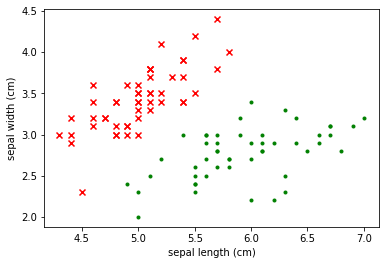

In [9]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(data0['sepal length (cm)'],data0['sepal width (cm)'],color = 'red',marker='x')
plt.scatter(data1['sepal length (cm)'],data1['sepal width (cm)'],color = 'green',marker='.')
# plt.scatter(data2['sepal length (cm)'],data2['sepal width (cm)'],color = 'blue',marker='x')

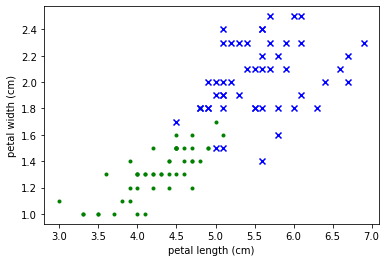

In [10]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
# plt.scatter(data0['petal length (cm)'],data0['petal width (cm)'],color = 'red',marker='x')
plt.scatter(data1['petal length (cm)'],data1['petal width (cm)'],color = 'green',marker='.')
plt.scatter(data2['petal length (cm)'],data2['petal width (cm)'],color = 'blue',marker='x')

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x = data.drop(['target'],axis=1)
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
y = data.target
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [14]:
x_train ,x_test ,y_train ,y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True,stratify=y)

In [15]:
x_train.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,120.000000,120.000000,120.00000,120.000000
mean,5.841667,3.048333,3.77000,1.205000
std,0.840926,0.448524,1.76852,0.762663
min,4.300000,2.000000,1.10000,0.100000
25%,5.100000,2.800000,1.60000,0.300000
50%,5.750000,3.000000,4.25000,1.300000
75%,6.400000,3.325000,5.10000,1.800000
max,7.900000,4.400000,6.90000,2.500000


In [16]:
x_test.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,30.000000,30.000000,30.000000,30.000000
mean,5.850000,3.093333,3.710000,1.176667
std,0.788167,0.385901,1.781582,0.773119
min,4.400000,2.300000,1.000000,0.200000
25%,5.250000,2.925000,1.550000,0.200000
50%,6.050000,3.000000,4.500000,1.400000
75%,6.500000,3.300000,5.075000,1.800000
max,7.300000,4.000000,6.300000,2.400000


In [17]:
from sklearn.svm import SVC
model = SVC(probability=True)

In [18]:
model.fit(x_train,y_train)

SVC(probability=True)

In [19]:
model.score(x_test,y_test)

0.9666666666666667

In [20]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model,x_test,y_test,cv=10,scoring='neg_mean_squared_error')
rmse = np.sqrt(-score)
rmse.mean()

0.11547005383792515